In [78]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

import shared_functions

In [79]:
bf = joblib.load('joblib/catsNdogs_mw_bf.joblib')

In [85]:
def last_tax(x):
    res_final = ''
    sp = x.split(';')
    for i in range(len(sp)-1,-1,-1):
        res_final = sp[i] +';'+res_final
        if (sp[i]!='Other'):
            break
    return(res_final[:-1])
def compare_bf(level,features,clr_b,draw):
    name = shared_functions.make_name(level,features,clr_b,True)
    view_name = shared_functions.view_name(level,features,clr_b)
    print(view_name)
    rf = joblib.load('joblib/'+name)
    f,chao = bf[(level,features)]
    if (chao):
        f = f + ['mean_chao']
    #print(f)
    ffdr,chao = bf[(level,'best_fdr')]
    fholm,chao = bf[(level,'best_holm')]
    df = pd.DataFrame.from_dict({'f_names':f,'f_importance':rf.feature_importances_})
    pd.set_option('max_colwidth', 800)
    pd.set_option('max_rows', 800)
    df = df.sort_values('f_importance',ascending=False)
    df['mw_fdr'] = df.f_names.isin(ffdr)
    df['mw_holm'] = df.f_names.isin(fholm)
    df = df.reset_index(drop=True)
    print('All features:',df.shape[0],'MW-selected(fdr):',len(ffdr))
    
    x = set(df.iloc[:len(ffdr),].f_names)
    y = set(ffdr)
    print('intersection of MW-selected features with respective top N RF feature_importance:',len(x.intersection(y))/len(ffdr))    
    if (draw):
        df['f_names'] = df.f_names.apply(last_tax)
        plt.figure(figsize=(6.6,0.18*len(ffdr)))
        plt.rcParams.update({'font.size': 6,'axes.labelsize':8,'xtick.labelsize':8,'ytick.labelsize':8})
        sns.set_style("whitegrid")
        sns.barplot(data = df.loc[0:len(ffdr)-1,],y='f_names',x='f_importance',hue='mw_fdr',dodge=False)
        plt.ylabel('')
        plt.xlabel('impurity-based feature importance')

## RF feature importance

In [86]:
compare_bf(4,'all',False,False)
compare_bf(4,'all',True,False)
compare_bf(5,'all',False,False)
compare_bf(5,'all',True,False)

Family_ALL
All features: 56 MW-selected(fdr): 14
intersection of MW-selected features with respective top N RF feature_importance: 0.8571428571428571
Family_ALL_CLR
All features: 56 MW-selected(fdr): 14
intersection of MW-selected features with respective top N RF feature_importance: 0.7142857142857143
Genus_ALL
All features: 139 MW-selected(fdr): 32
intersection of MW-selected features with respective top N RF feature_importance: 0.75
Genus_ALL_CLR
All features: 139 MW-selected(fdr): 32
intersection of MW-selected features with respective top N RF feature_importance: 0.65625


Family_ALL
All features: 56 MW-selected(fdr): 14
intersection of MW-selected features with respective top N RF feature_importance: 0.8571428571428571


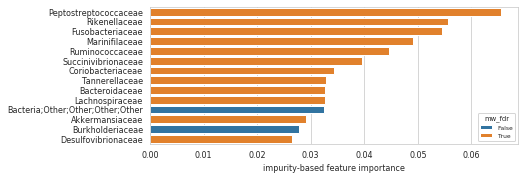

In [87]:
compare_bf(4,'all',False,True)
plt.savefig('pics/SupplementaryFigure4A.pdf', dpi = 300, bbox_inches='tight')

In [83]:
#compare_bf(4,'all',True,True)

Genus_ALL
All features: 139 MW-selected(fdr): 32
intersection of MW-selected features with respective top N RF feature_importance: 0.75


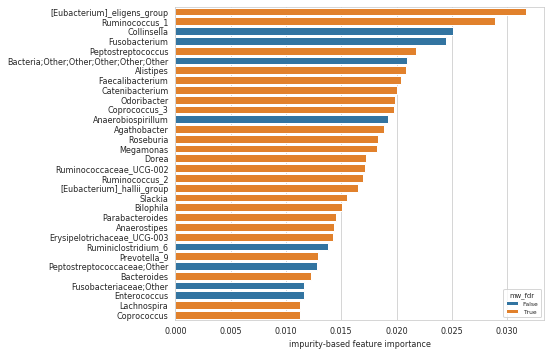

In [88]:
compare_bf(5,'all',False,True)
plt.savefig('pics/SupplementaryFigure4B.pdf', dpi = 300, bbox_inches='tight')

In [89]:
#compare_bf(5,'all',True,True)